# Analisis de calidad de datos y reporte de resultados


Este proyecto se realiza en el marco de la candidatura de Henry Cardenas para la vacante como Data Quality Engineer para R5. Se me proporcionó un JSON con informacion adquirida mediante la API de spotify, el cual fue normalizado en un CSV para realiar un analisis de calidad de datos.

##Conjuntos de datos proporcionados:

Informacion de Spotify de Taylor Swift en formato CSV

##Dimensiones del marco de calidad de datos:

siguiendo la metodologia planteada por DAMA UK se evaluaran las siguientes dimensiones de cada una de las variables de interes.

Completitud: la proporcion de datos almacenados respecto al "100%" de los datos.

Unicidad: ningun registro es almacenado mas de una vez

Oportunidad: el grado en el que los datos representan la realidad en el tiempo requerido.

Validez: los datos estan representandos conforme a la sintaxis de su definicion (formato, tipo, rango)


Exactitud: el grado en que los datos representan la realidad del objeto o evento descrito.


Coherencia: la ausencia de diferencia al comparar dos o mas fuentes representaciones respecto a una definicion.

In [127]:
# importando la libreria pandas
import pandas as pd

In [128]:
# cargando la informacion del CSV en un DataFrame
tsf_df = pd.read_csv("taylor_swift_spotify_flattened.csv")

## Explorando y analizando la calidad del dato de: Informacion de Spotify de Taylor Swift

In [ ]:
#mostrar los datos contenidos en el DF
print(tsf_df.head())

   disc_number  duration_ms explicit  track_number  track_popularity  \
0            1       212600    False             1                77   
1            1       231833    False             2                78   
2            1       231000    False             3                79   
3            1       235800    False             4                78   
4            1       193289    False             5                77   

                 track_id                                     track_name  \
0  4WUepByoeqcedHoYhSNHRt         Welcome To New York (Taylor's Version)   
1  0108kcWLnn2HlH2kedi1gn                 Blank Space (Taylor's Version)   
2  3Vpk1hfMAQme8VJ0SNRSkd                       Style (Taylor's Version)   
3  1OcSfkeCg9hRC2sFKB4IMJ            Out Of The Woods (Taylor's Version)   
4  2k0ZEeAqzvYMcx9Qt5aClQ  All You Had To Do Was Stay (Taylor's Version)   

   audio_features.danceability  audio_features.energy  audio_features.key  \
0                        0.757   

### Revisando la completitud de los datos

In [ ]:
# revisar valores nulos
total_valores_nulos = tsf_df.isnull().sum()

# calcular el total de valores
total_valores = tsf_df.count().sort_values(ascending=True)

# calcular el porcentaje de valores nulos
porcentaje_de_valores_nulos = total_valores_nulos/total_valores *100

# convertir al dataframe de valores faltantes
completitud = pd.concat({'total valores' : total_valores, ' total valores nulos': total_valores_nulos, 'pocentaje de valores nulos (%)': porcentaje_de_valores_nulos}, axis=1)

# display missing values
completitud

,total valores,total valores nulos,pocentaje de valores nulos (%)
album_name,477,62,12.997904
track_id,531,8,1.506591
track_name,532,7,1.315789
audio_features.energy,537,2,0.372439
audio_features.loudness,537,2,0.372439
audio_features.danceability,537,2,0.372439
audio_features.time_signature,538,1,0.185874
audio_features.speechiness,538,1,0.185874
audio_features.key,538,1,0.185874
audio_features.acousticness,538,1,0.185874


In [ ]:
# creando un dataframe con los id de album con el nombre como valor nulo
completitud_album_name = tsf_df[tsf_df["album_name"].isna()]
print(completitud_album_name["album_id"].drop_duplicates())
print(completitud_album_name["album_total_tracks"].drop_duplicates())

329    1MPAXuTVL2Ej5x0JHiSPq8
429    6fyR4wBPwLHKcRtxgd4sGh
Name: album_id, dtype: object
329    46
429    16
Name: album_total_tracks, dtype: object


la columna "album_name" presenta 62 valores nulos, correspondientes a las 62 pistas en los dos albumes sin nombre con album_id "1MPAXuTVL2Ej5x0JHiSPq8" y "6fyR4wBPwLHKcRtxgd4sGh"

In [ ]:
# creando un dataframe con los nombres de las pistas que tienen el id como valor nulo
completitud_track_id = tsf_df[tsf_df["track_id"].isna()]
print(completitud_track_id["track_name"].drop_duplicates())

321                                             Gorgeous
363                                       Jump Then Fall
375                                  Welcome To New York
379                           All You Had To Do Was Stay
382                                            Bad Blood
434    Back To December/Apologize/You're Not Sorry - ...
442                                Enchanted - Live/2011
445                                       Mine - POP Mix
Name: track_name, dtype: object


la columna "track_id" presenta 8 valores nulos, los cuales se encuentran en las canciones identificadas mediante nombre e indice en el espacio anterior.

In [ ]:
# creando un dataframe con los id de las pistas que tienen el nombre como valor nulo
completitud_track_name = tsf_df[tsf_df["track_name"].isna()]
print(completitud_track_name["track_id"].drop_duplicates())

77     1QQii3pa5m8MEda0nbkjfw
91     02Zkkf2zMkwRGQjZ7T4p8f
104    7712gjoih4QoDbXpljEk21
391    4FoV729rw7IhoKlMZW5K5V
396    71PmZqBXH0RUETqxpwlV0w
401    0TvQLMecTE8utzoNmvXRbK
408    7gJtmLyPTwKzhGzMBXtuXH
Name: track_id, dtype: object


la columna "track_name" presenta 7 valores nulos, los cuales se encuentran en las canciones identificadas mediante "Track_id" e indice en el espacio anterior.

In [ ]:
# creando un dataframe para cada "audio feature" con valores nulos.
completitud_af_energy = tsf_df[tsf_df["audio_features.energy"].isna()]
completitud_af_loudness = tsf_df[tsf_df["audio_features.loudness"].isna()]
completitud_af_danceability = tsf_df[tsf_df["audio_features.danceability"].isna()]
completitud_af_time_signature = tsf_df[tsf_df["audio_features.time_signature"].isna()]
completitud_af_speechiness = tsf_df[tsf_df["audio_features.speechiness"].isna()]
completitud_af_key = tsf_df[tsf_df["audio_features.key"].isna()]
completitud_af_acousticness = tsf_df[tsf_df["audio_features.acousticness"].isna()]
completitud_af_liveness = tsf_df[tsf_df["audio_features.liveness"].isna()]
completitud_af_tempo = tsf_df[tsf_df["audio_features.tempo"].isna()]

# creando una lista de dataframes para usar en la concatenacion.
afs = [completitud_af_energy,
completitud_af_loudness,
completitud_af_danceability,
completitud_af_time_signature,
completitud_af_speechiness,
completitud_af_key,
completitud_af_acousticness,
completitud_af_liveness,
completitud_af_tempo]
# creando una lista de columnas para llamar la infomracion del dataframe concatenado
afs_cols = ["track_name","audio_features.energy","audio_features.loudness","audio_features.danceability","audio_features.time_signature",
            "audio_features.speechiness","audio_features.key","audio_features.acousticness","audio_features.liveness","audio_features.tempo"]

# concatenando los data frames
afs_resume = pd.concat(afs)

# removiendo los duplicados para mostrar la tabla de resumen de las canciones con valores de "audio features" nulos
afs_resume[afs_cols].drop_duplicates()

,track_name,audio_features.energy,audio_features.loudness,audio_features.danceability,audio_features.time_signature,audio_features.speechiness,audio_features.key,audio_features.acousticness,audio_features.liveness,audio_features.tempo
330,Wildest Dreams,NaN,NaN,NaN,4.0,NaN,8.0,0.0692,0.106,139.997
363,Jump Then Fall,NaN,-5.712,0.617,NaN,0.0274,2.0,0.1130,0.074,80.007
334,Teardrops On My Guitar - Radio Single Remix,0.427,NaN,0.626,4.0,0.0234,NaN,0.3130,0.138,99.959
431,The Story Of Us - Live,0.908,-5.156,NaN,4.0,0.0651,9.0,NaN,0.815,139.813
341,So It Goes...,0.610,-7.283,0.574,4.0,0.0732,2.0,0.1220,NaN,74.957
432,Mean - Live/2011,0.915,-4.373,0.429,4.0,0.0690,4.0,0.1540,0.693,NaN


En la tabla anterior se pueden apreciar los registros de "audio_features" que se encuentran sin datos con el nombre de su respectiva cancion.

las demas columnas no presentan valores nulos

## Revisando la unicidad de los datos

In [ ]:
# revisar valores duplicados en el dataframe principal
valores_duplicados = tsf_df.duplicated()

# calcular e imprimir el numero de registros duplicados y la unicidad porcentual del data frame
print("el numero de registros duplicados en el dataframe es {}".format(valores_duplicados.sum()))
print("su unicidad es del  {} %".format(round((total_valores["album_id"]-valores_duplicados.sum())/total_valores["album_id"]*100,4)))

el numero de registros duplicados en el dataframe es 18
su unicidad es del  96.6605 %


In [ ]:
# mostrar la tabla de valores duplicados en el dataframe principal organizados por "track_number" para darle detalle al informe
tsf_df[valores_duplicados].sort_values("track_number")

,disc_number,duration_ms,explicit,track_number,track_popularity,track_id,track_name,audio_features.danceability,audio_features.energy,audio_features.key,...,audio_features.tempo,audio_features.id,audio_features.time_signature,artist_id,artist_name,artist_popularity,album_id,album_name,album_release_date,album_total_tracks
295,1,170640,False,1,77,43rA71bccXFGD4C8GOpIlN,I Forgot That You Existed,0.664,0.316,5.0,...,92.875,43rA71bccXFGD4C8GOpIlN,4.0,06HL4z0CvFAxyc27GX,Taylor Swift,120,1NAmidJlEaVgA3MpcPFYGq,Lover,2019-08-23,18
297,1,221306,False,3,92,1dGr1c8CrMLDpV6mPbImSI,Lover,0.359,0.543,7.0,...,68.534,1dGr1c8CrMLDpV6mPbImSI,4.0,06HL4z0CvFAxyc27GX,Taylor Swift,120,1NAmidJlEaVgA3MpcPFYGq,Lover,2019-08-23,18
298,1,190360,False,4,86,3RauEVgRgj1IuWdJ9fDs70,The Man,0.777,0.658,0.0,...,110.048,3RauEVgRgj1IuWdJ9fDs70,4.0,06HL4z0CvFAxyc27GX,Taylor Swift,120,1NAmidJlEaVgA3MpcPFYGq,Lover,2019-08-23,18
299,1,211240,False,5,82,3pHkh7d0lzM2AldUtz2x37,The Archer,0.292,0.574,0.0,...,124.344,3pHkh7d0lzM2AldUtz2x37,4.0,06HL4z0CvFAxyc27GX,Taylor Swift,120,1NAmidJlEaVgA3MpcPFYGq,Lover,2019-08-23,18
300,1,173386,False,6,78,2YWtcWi3a83pdEg3Gif4Pd,I Think He Knows,0.897,0.366,0.0,...,100.003,2YWtcWi3a83pdEg3Gif4Pd,4.0,06HL4z0CvFAxyc27GX,Taylor Swift,120,1NAmidJlEaVgA3MpcPFYGq,Lover,2019-08-23,18
301,1,234146,False,7,83,214nt20w5wOxJnY462klLw,Miss Americana & The Heartbreak Prince,0.662,0.747,11.0,...,150.088,214nt20w5wOxJnY462klLw,4.0,06HL4z0CvFAxyc27GX,Taylor Swift,120,1NAmidJlEaVgA3MpcPFYGq,Lover,2019-08-23,18
302,1,222400,False,8,86,4y5bvROuBDPr5fuwXbIBZR,Paper Rings,0.811,0.719,9.0,...,103.979,4y5bvROuBDPr5fuwXbIBZR,4.0,06HL4z0CvFAxyc27GX,Taylor Swift,120,1NAmidJlEaVgA3MpcPFYGq,Lover,2019-08-23,18
303,1,287266,False,9,81,12M5uqx0ZuwkpLp5rJim1a,Cornelia Street,0.824,0.624,0.0,...,102.012,12M5uqx0ZuwkpLp5rJim1a,4.0,06HL4z0CvFAxyc27GX,Taylor Swift,120,1NAmidJlEaVgA3MpcPFYGq,Lover,2019-08-23,18
304,1,198533,False,10,79,2dgFqt3w9xIQRjhPtwNk3D,Death By A Thousand Cuts,0.712,0.732,4.0,...,94.071,2dgFqt3w9xIQRjhPtwNk3D,4.0,06HL4z0CvFAxyc27GX,Taylor Swift,120,1NAmidJlEaVgA3MpcPFYGq,Lover,2019-08-23,18
305,1,190240,False,11,80,1LLXZFeAHK9R4xUramtUKw,London Boy,0.695,0.710,1.0,...,157.925,1LLXZFeAHK9R4xUramtUKw,4.0,06HL4z0CvFAxyc27GX,Taylor Swift,120,1NAmidJlEaVgA3MpcPFYGq,Lover,2019-08-23,18


dentro de los 18 registros identificados como duplicados se encuentran 17 canciones del album lovers exceptuando la pista 2 "Cruel Summer" que no se identifica como duplicada en el dataframe general debido a que para la columna "explicit" el duplicado tiene el valor "no" en vez de "false", lo cual sera retomado al revisar la validez de la columna. tambien se identifica la cancion "Hits Different" como registro duplicado apareciendo como track numero 24 en el album "Midnights (The Til Dawn Edition)" el cual en efecto reporta 24 pistas.

## Revisando la Oportunidad de los datos

el JSON fue creado en google drive el 26 dic 2023 a las 20:45 por el usuario L. C., sin embargo teniendo en cuenta que la informacion es estatica y la evaluacion de esta dimension es opcional se asumira que es oportuna

## Revisando la Validez de los datos

para verificar la validez de los datos se contrastara cada columna con el tipo de dato y su formato esperado teniendo en cuenta la documentacion de la API de spotify.

In [ ]:
# obteniendo informacion sobre tipo de dato y numero de valores nulos en el dataframe principal.
tsf_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 539 entries, 0 to 538
Data columns (total 27 columns):
 #   Column                           Non-Null Count  Dtype  
---  ------                           --------------  -----  
 0   disc_number                      539 non-null    int64  
 1   duration_ms                      539 non-null    int64  
 2   explicit                         539 non-null    object 
 3   track_number                     539 non-null    int64  
 4   track_popularity                 539 non-null    int64  
 5   track_id                         531 non-null    object 
 6   track_name                       532 non-null    object 
 7   audio_features.danceability      537 non-null    float64
 8   audio_features.energy            537 non-null    float64
 9   audio_features.key               538 non-null    float64
 10  audio_features.loudness          537 non-null    float64
 11  audio_features.mode              539 non-null    int64  
 12  audio_features.speechi

### disc_number

segun la documentacion encontrada en la url "https://developer.spotify.com/documentation/web-api/reference/get-track" el disc_number presenta la siguiente descripcion: <br>
 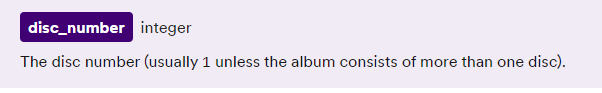

In [ ]:
# contar el numero de valores distintos para la columna
print(tsf_df.groupby("disc_number")["disc_number"].count())

disc_number
1    522
2     17
Name: disc_number, dtype: int64


para la columna se puede apreciar que los valores son 1 o 2 siendo 1 el mas comun como se refleja en la documentacion de la API

### duration_ms

segun la documentacion encontrada en la url "https://developer.spotify.com/documentation/web-api/reference/get-track" la "duration_ms" presenta la siguiente descripcion:

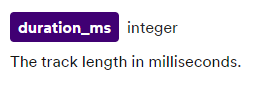

In [ ]:
# generar estadisticas descriptivas de la variable numerica.
tsf_df["duration_ms"].describe()

count       539.000000
mean     236003.725417
std       55019.871010
min     -223093.000000
25%      209486.500000
50%      233626.000000
75%      259045.500000
max      613026.000000
Name: duration_ms, dtype: float64

se pueden apreciar valores negativos, lo cual es imposible para una variable temporal, a continuacion se presentan los registros con valores inferiores a 1000 con el fin de identificar tambien pistas inusualmente cortas.

In [ ]:
# filtrando el dataframe principal para "duration_ms" menor que 60000
tsf_df[tsf_df["duration_ms"]<60000]

,disc_number,duration_ms,explicit,track_number,track_popularity,track_id,track_name,audio_features.danceability,audio_features.energy,audio_features.key,...,audio_features.tempo,audio_features.id,audio_features.time_signature,artist_id,artist_name,artist_popularity,album_id,album_name,album_release_date,album_total_tracks
392,1,-107133,False,18,0,4eTXfpHxhxVofrBUjAhPMg,I Wish You Would - Voice Memo,0.781,0.357,0.0,...,118.317,4eTXfpHxhxVofrBUjAhPMg,4.0,06HL4z0CvFAxyc27GX,Taylor Swift,120,1yGbNOtRIgdIiGHOEBaZWf,1989 (Deluxe),2014-01-01,19
408,1,-223093,False,2,59,7gJtmLyPTwKzhGzMBXtuXH,NaN,0.602,0.896,1.0,...,124.978,7gJtmLyPTwKzhGzMBXtuXH,4.0,06HL4z0CvFAxyc27GX,Taylor Swift,120,1KVKqWeRuXsJDLTW0VuD29,Red (Deluxe Edition),2012-10-22,22
420,1,10,False,14,56,5PjfMmF06QtxTPZBZHdhoZ,Everything Has Changed,0.624,0.458,6.0,...,80.016,5PjfMmF06QtxTPZBZHdhoZ,4.0,06HL4z0CvFAxyc27GX,Taylor Swift,120,1KVKqWeRuXsJDLTW0VuD29,Red (Deluxe Edition),2012-10-22,22
432,1,1000,False,4,47,7mFiEij8AXPUZB7aKLbUlQ,Mean - Live/2011,0.429,0.915,4.0,...,NaN,7mFiEij8AXPUZB7aKLbUlQ,4.0,06HL4z0CvFAxyc27GX,Taylor Swift,120,6fyR4wBPwLHKcRtxgd4sGh,NaN,2010-10-25,16
472,1,3000,False,14,152,7BFc7ffruhZ4Hecnqf5xju,Long Live,0.412,0.682,7.0,...,203.959,7BFc7ffruhZ4Hecnqf5xju,4.0,06HL4z0CvFAxyc27GX,Taylor Swift,120,6S6JQWzUrJVcJLK4fi74Fw,Speak Now (Deluxe Package),2010-01-01,22


es posible identificar 5 registros con duraciones inusuales, dentro de los cuales existen dos negativos, y tres de menos de 1 minuto.

### Explicit

segun la documentacion encontrada en la url "https://developer.spotify.com/documentation/web-api/reference/get-track" la "explicit" presenta la siguiente descripcion:

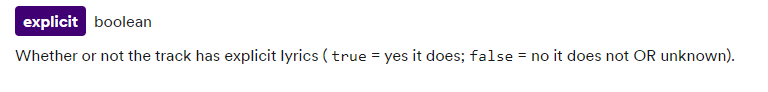

In [ ]:
# contar el numero de valores distintos para la columna
print(tsf_df.groupby("explicit")["explicit"].count())

explicit
False    480
No         4
Si         1
True      54
Name: explicit, dtype: int64


la columna "explicit" deberia ser un booleano solo con valores "True" o "False", sin embargo presenta 4 registros en el valor "No" y 1 registro en el valor "Si"

### track_number

segun la documentacion encontrada en la url "https://developer.spotify.com/documentation/web-api/reference/get-track" la columna "track_number" presenta la siguiente descripcion:

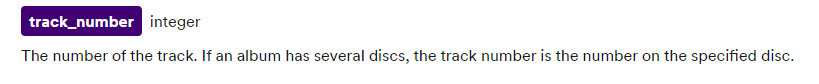

In [ ]:
# mostrar el tipo de variable de la columna
print(tsf_df["track_number"].dtype)
# generar estadisticas descriptivas de la variable numerica.
tsf_df["track_number"].describe()

int64


count    539.000000
mean      11.280148
std        7.965621
min        1.000000
25%        5.000000
50%       10.000000
75%       15.000000
max       46.000000
Name: track_number, dtype: float64

la columna "track_number" es de tipo int64 con minimo 1 y maximo 46 teniendo valores dentro de los esperados.

###  track_popularity
segun la documentacion encontrada en la url "https://developer.spotify.com/documentation/web-api/reference/get-track" la columna "track_popularity" presenta la siguiente descripcion:

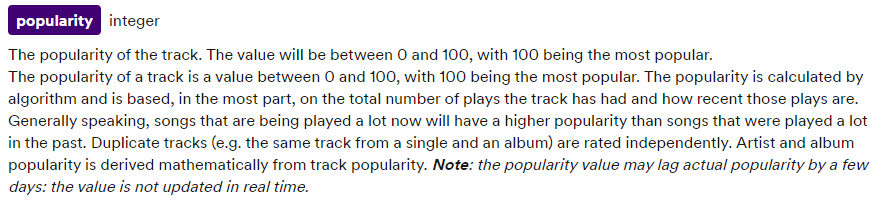

In [ ]:
# generar estadisticas descriptivas de la variable numerica.
tsf_df["track_popularity"].describe()

count    539.000000
mean      62.918367
std       22.498757
min      -92.000000
25%       51.000000
50%       69.000000
75%       77.000000
max      152.000000
Name: track_popularity, dtype: float64

segun su descripcion en la documentacion la columna "track_popularity" deberia tener valores entre 0 y 100, sin embargo en la estadistica descriptiva se aprecian valores fuera de este rango, estos valores se reportan en la tabla presentada en el siguiente bloque de codigo.

In [ ]:
# filtrando el dataframe principal para "track_popularity" menor que 0 o mayor que 100 y concatenando los dataframes
tp_1 = tsf_df[tsf_df["track_popularity"]<0]
tp_2 = tsf_df[tsf_df["track_popularity"]>100]
pd.concat([tp_1,tp_2])

,disc_number,duration_ms,explicit,track_number,track_popularity,track_id,track_name,audio_features.danceability,audio_features.energy,audio_features.key,...,audio_features.tempo,audio_features.id,audio_features.time_signature,artist_id,artist_name,artist_popularity,album_id,album_name,album_release_date,album_total_tracks
75,1,204852,True,11,-69,45R112Jz5hQeKgITXgSXzs,Karma,0.647,0.614,8.0,...,90.034,45R112Jz5hQeKgITXgSXzs,4.0,06HL4z0CvFAxyc27GX,Taylor Swift,120,1fnJ7k0bllNfL1kVdNVW1A,Midnights (The Til Dawn Edition),2027-05-26,24
89,1,202395,True,1,-70,4g2c7NoTWAOSYDy44l9nub,Lavender Haze,0.735,0.444,10.0,...,97.038,4g2c7NoTWAOSYDy44l9nub,4.0,06HL4z0CvFAxyc27GX,Taylor Swift,120,3lS1y25WAhcqJDATJK70Mq,Midnights (3am Edition),2022-10-22,20
109,1,202395,True,1,-85,5jQI2r1RdgtuT8S3iG8zFC,Lavender Haze,0.733,0.436,10.0,...,96.985,5jQI2r1RdgtuT8S3iG8zFC,4.0,06HL4z0CvFAxyc27GX,Taylor Swift,120,151w1FgRZfnKZA9FEcg9Z3,Midnights,2022-10-21,13
111,1,200690,False,3,-92,0V3wPSX9ygBnCm8psDIegu,Anti-Hero,0.637,0.643,4.0,...,97.008,0V3wPSX9ygBnCm8psDIegu,4.0,06HL4z0CvFAxyc27GX,Taylor Swift,120,151w1FgRZfnKZA9FEcg9Z3,Midnights,2022-10-21,13
115,1,210556,True,7,-75,0heeNYlwOGuUSe7TgUD27B,Question...?,0.751,0.502,7.0,...,108.943,0heeNYlwOGuUSe7TgUD27B,4.0,06HL4z0CvFAxyc27GX,Taylor Swift,120,151w1FgRZfnKZA9FEcg9Z3,Midnights,2022-10-21,13
128,1,244586,False,7,-71,2r9CbjYgFhtAmcFv1cSquB,I Almost Do (Taylor's Version),0.511,0.559,4.0,...,145.880,2r9CbjYgFhtAmcFv1cSquB,4.0,06HL4z0CvFAxyc27GX,Taylor Swift,120,6kZ42qRrzov54LcAk4onW9,Red (Taylor's Version),2021-11-12,34
472,1,3000,False,14,152,7BFc7ffruhZ4Hecnqf5xju,Long Live,0.412,0.682,7.0,...,203.959,7BFc7ffruhZ4Hecnqf5xju,4.0,06HL4z0CvFAxyc27GX,Taylor Swift,120,6S6JQWzUrJVcJLK4fi74Fw,Speak Now (Deluxe Package),2010-01-01,22


como se puede apreciar existen seis valores negativos para la columna y un valor por encima de 100, lo cual los convertiria en valores atipicos para la descripcion.

### track_id

segun la documentacion encontrada en la url "https://developer.spotify.com/documentation/web-api/reference/get-track" la columna "track_id" presenta la siguiente descripcion:

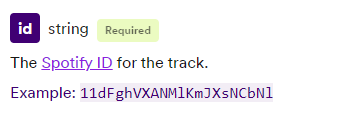

In [ ]:
# usando el primer registro que se encuentra validado para tomar la longitud del string
str_len = len(tsf_df['track_id'][0])
print("la longitud del string de la columna es {}".format(str_len))
# revisando que todos los registros de la columna sean strings de la misma longitud
tsf_df[tsf_df['track_id'].str.len()!=str_len]

la longitud del string de la columna es 22


,disc_number,duration_ms,explicit,track_number,track_popularity,track_id,track_name,audio_features.danceability,audio_features.energy,audio_features.key,...,audio_features.tempo,audio_features.id,audio_features.time_signature,artist_id,artist_name,artist_popularity,album_id,album_name,album_release_date,album_total_tracks
321,1,209680,False,8,84,NaN,Gorgeous,0.800,0.535,7.0,...,92.027,1ZY1PqizIl78geGM4xWlEA,4.0,06HL4z0CvFAxyc27GX,Taylor Swift,120,6DEjYFkNZh67HP7R9PSZvv,reputation,2017-11-10,15
363,1,238093,False,35,32,NaN,Jump Then Fall,0.617,NaN,2.0,...,80.007,5zytSTR2g0I9psX2Z12ex6,NaN,06HL4z0CvFAxyc27GX,Taylor Swift,120,1MPAXuTVL2Ej5x0JHiSPq8,NaN,2017-11-09,46
375,1,212600,False,1,60,NaN,Welcome To New York,0.789,0.634,7.0,...,116.992,3nRmDz7qGCvsMS30rGGY0x,4.0,06HL4z0CvFAxyc27GX,Taylor Swift,120,1yGbNOtRIgdIiGHOEBaZWf,1989 (Deluxe),2014-01-01,19
379,1,193293,False,5,60,NaN,All You Had To Do Was Stay,0.605,0.725,5.0,...,96.970,6aLOekfwbytwWvQftxTEF0,4.0,06HL4z0CvFAxyc27GX,Taylor Swift,120,1yGbNOtRIgdIiGHOEBaZWf,1989 (Deluxe),2014-01-01,19
382,1,211933,False,8,61,NaN,Bad Blood,0.646,0.794,7.0,...,170.216,2NlmmAjGYrrjAp0MED5rGx,4.0,06HL4z0CvFAxyc27GX,Taylor Swift,120,1yGbNOtRIgdIiGHOEBaZWf,1989 (Deluxe),2014-01-01,19
434,1,362826,False,6,54,NaN,Back To December/Apologize/You're Not Sorry - ...,0.374,0.516,2.0,...,142.057,1IsquhJFJ0qcFZI7FeAEuN,4.0,06HL4z0CvFAxyc27GX,Taylor Swift,120,6fyR4wBPwLHKcRtxgd4sGh,NaN,2010-10-25,16
442,1,389213,False,14,49,NaN,Enchanted - Live/2011,0.340,0.663,8.0,...,163.678,3lm4L3pPL32PFy74dR17OR,4.0,06HL4z0CvFAxyc27GX,Taylor Swift,120,6fyR4wBPwLHKcRtxgd4sGh,NaN,2010-10-25,16
445,1,230546,False,1,49,NaN,Mine - POP Mix,0.696,0.768,7.0,...,121.050,0GxW5K0qzrq7L1jwSY5OmY,4.0,06HL4z0CvFAxyc27GX,Taylor Swift,120,6Ar2o9KCqcyYF9J0aQP3au,Speak Now,2010-10-25,14


para la columna "track_id" el formato de string de 22 caracteres se cumple para todo los registros no nulos.

### track_name

segun la documentacion encontrada en la url "https://developer.spotify.com/documentation/web-api/reference/get-track" la columna "track_name" presenta la siguiente descripcion:

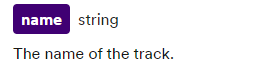


In [95]:
# definir una funcion para aplicar a cada fila verificando si es un string.
def is_string(x):
    return isinstance(x, str)
# aplicar la funcion "is_string" a cada fila del dataframe y crear una columna nueva con el booleano correspondiente
tsf_df["track_name_str"] = tsf_df["track_name"].apply(is_string)
# seleccionar los registros con string a False
tsf_df[tsf_df["track_name_str"] == False]

,disc_number,duration_ms,explicit,track_number,track_popularity,track_id,track_name,audio_features.danceability,audio_features.energy,audio_features.key,...,audio_features.id,audio_features.time_signature,artist_id,artist_name,artist_popularity,album_id,album_name,album_release_date,album_total_tracks,track_name_str
77,1,191039,False,13,68,1QQii3pa5m8MEda0nbkjfw,NaN,0.661,0.345,4.0,...,1QQii3pa5m8MEda0nbkjfw,4.0,06HL4z0CvFAxyc27GX,Taylor Swift,120,1fnJ7k0bllNfL1kVdNVW1A,Midnights (The Til Dawn Edition),2027-05-26,24,False
91,1,200690,False,3,71,02Zkkf2zMkwRGQjZ7T4p8f,NaN,0.638,0.634,4.0,...,02Zkkf2zMkwRGQjZ7T4p8f,4.0,06HL4z0CvFAxyc27GX,Taylor Swift,120,3lS1y25WAhcqJDATJK70Mq,Midnights (3am Edition),2022-10-22,20,False
104,1,196258,False,16,72,7712gjoih4QoDbXpljEk21,NaN,0.700,0.509,7.0,...,7712gjoih4QoDbXpljEk21,4.0,06HL4z0CvFAxyc27GX,Taylor Swift,120,3lS1y25WAhcqJDATJK70Mq,Midnights (3am Edition),2022-10-22,20,False
391,1,216333,False,17,0,4FoV729rw7IhoKlMZW5K5V,NaN,0.592,0.128,9.0,...,4FoV729rw7IhoKlMZW5K5V,4.0,06HL4z0CvFAxyc27GX,Taylor Swift,120,1yGbNOtRIgdIiGHOEBaZWf,1989 (Deluxe),2014-01-01,19,False
396,1,231000,False,3,64,71PmZqBXH0RUETqxpwlV0w,NaN,0.598,0.786,2.0,...,71PmZqBXH0RUETqxpwlV0w,4.0,06HL4z0CvFAxyc27GX,Taylor Swift,120,5fy0X0JmZRZnVa2UEicIOl,1989,2014-01-01,13,False
401,1,211933,False,8,79,0TvQLMecTE8utzoNmvXRbK,NaN,0.652,0.802,7.0,...,0TvQLMecTE8utzoNmvXRbK,4.0,06HL4z0CvFAxyc27GX,Taylor Swift,120,5fy0X0JmZRZnVa2UEicIOl,1989,2014-01-01,13,False
408,1,-223093,False,2,59,7gJtmLyPTwKzhGzMBXtuXH,NaN,0.602,0.896,1.0,...,7gJtmLyPTwKzhGzMBXtuXH,4.0,06HL4z0CvFAxyc27GX,Taylor Swift,120,1KVKqWeRuXsJDLTW0VuD29,Red (Deluxe Edition),2012-10-22,22,False


Se evidencia para la columna "track_name" que los unicos valores que no son string son los siete correspondientes a los valores nulos identificados anteriormente

### audio_features
segun la documentacion encontrada en la url "https://developer.spotify.com/documentation/web-api/reference/get-audio-features" las columnas referentes a las "audio_features" se definen asi:

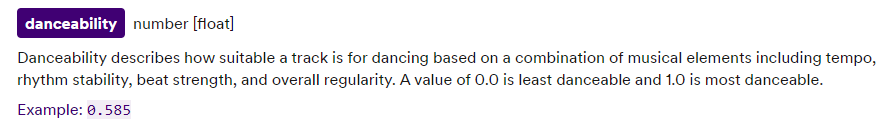

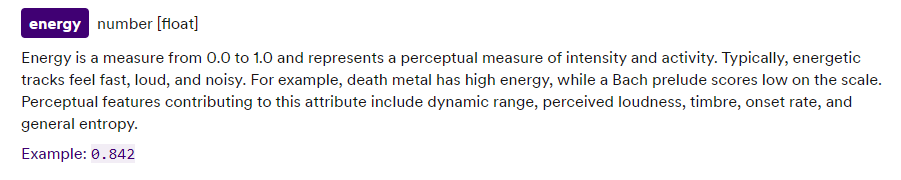

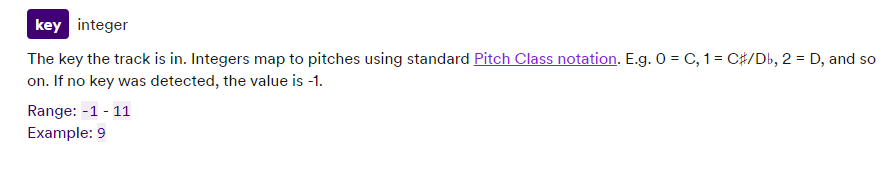

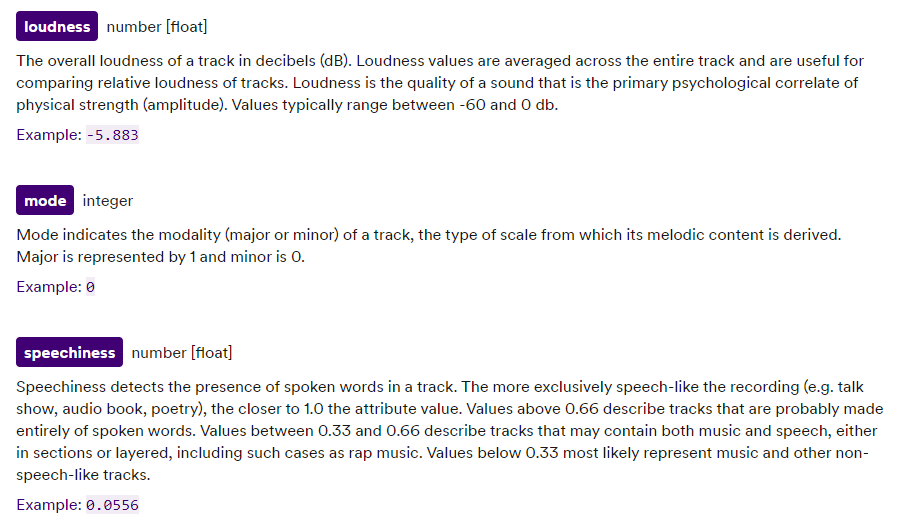

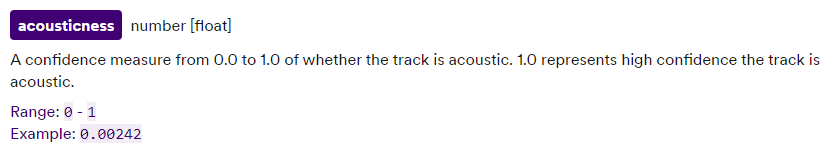

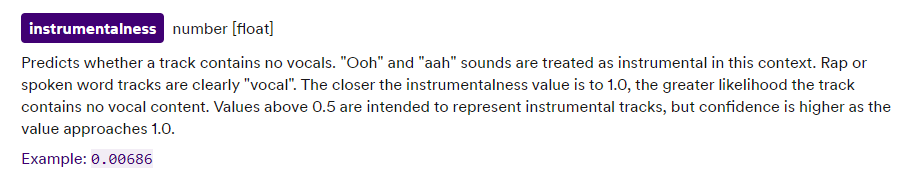

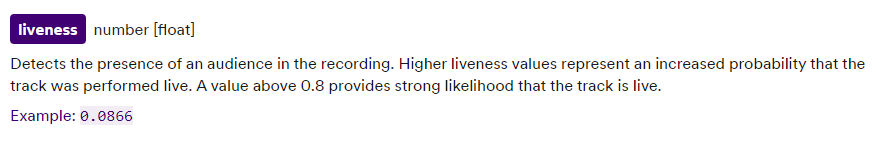

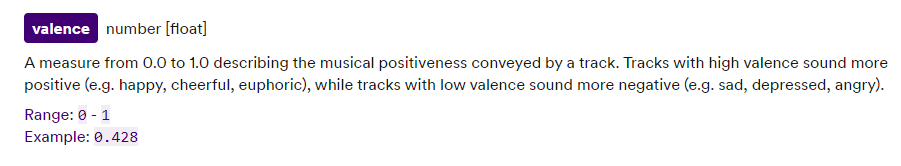

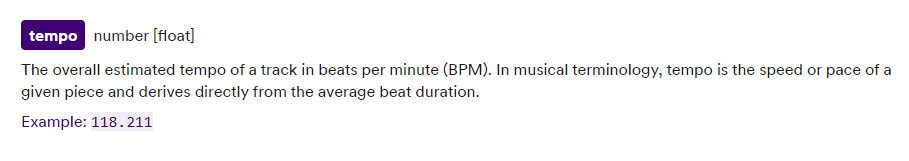

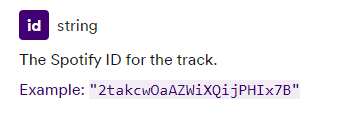

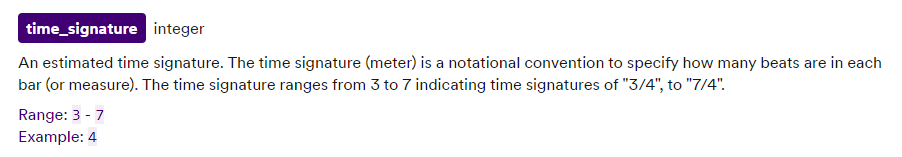

In [118]:
# generar estadisticas descriptivas de la variable numerica.
tsf_df[["audio_features.danceability","audio_features.energy","audio_features.key"
,"audio_features.loudness","audio_features.mode","audio_features.speechiness","audio_features.acousticness"]].describe()

,audio_features.danceability,audio_features.energy,audio_features.key,audio_features.loudness,audio_features.mode,audio_features.speechiness,audio_features.acousticness
count,537.000000,537.000000,538.000000,537.000000,539.000000,538.000000,538.000000
mean,0.587242,0.573065,4.587361,-7.520639,0.912801,0.057709,0.337806
std,0.116858,0.192309,3.246082,2.933158,0.282388,0.073146,0.395292
min,0.243000,0.118000,0.000000,-17.932000,0.000000,0.023100,-0.003540
25%,0.517000,0.436000,2.000000,-9.287000,1.000000,0.030525,0.036250
50%,0.595000,0.589000,5.000000,-6.942000,1.000000,0.037750,0.167500
75%,0.661000,0.729000,7.000000,-5.376000,1.000000,0.056400,0.663750
max,0.897000,0.949000,11.000000,-1.909000,1.000000,0.912000,5.000000


debido a que se identifica anteriormente que la columna "audio_features.instrumentalness" es de tipo "object" se presume que contiene strings, por lo que se revisara mas en detalle

In [151]:
# verificar el tipo de datos en la columna
tsf_df["audio_features.instrumentalness"].dtypes

dtype('O')

como efectivametne el tipo es objeto se procede a intentar convertirlo a tipo "float" que seria propio de las dimensiones y limites establecidos en la documentacion

In [152]:
# convertir la columna a tipo float
tsf_df["audio_features.instrumentalness"].astype(float)

ValueError: could not convert string to float: '7.28x-06'

el intento de convertir la columna a tipo float arroja un error debido a la presencia del valor "7.28x-06" el cual al contener una "x" en lugar de la "e" convencional de la notacion cientifica genera el error.

In [158]:
# creando una columna logica con los valores que contiene el caracter "x"
tsf_df["audio_features.instrumentalness_x"] = tsf_df["audio_features.instrumentalness"].str.contains("x")
# creando un dataframe removiendo el valor para probar la conversion nuevamente e identiicar valores adicionales que generen error
conversion_test = tsf_df[["track_name","audio_features.instrumentalness"]][tsf_df["audio_features.instrumentalness_x"]== False]

In [159]:
conversion_test["audio_features.instrumentalness"].astype(float)

0      0.000037
1      0.000000
2      0.019700
3      0.000056
4      0.000000
         ...   
534    0.000000
535    0.000807
536    0.000000
537    0.000000
538    0.000000
Name: audio_features.instrumentalness, Length: 538, dtype: float64

como se puede observar al remover el valor los demas valores son convertidos a float sin inconveniente

Continuando con las demas "audio_features"

In [160]:
# generar estadisticas descriptivas de la variable numerica.
tsf_df[["audio_features.liveness","audio_features.valence","audio_features.tempo"
,"audio_features.id","audio_features.time_signature"]].describe()

,audio_features.liveness,audio_features.valence,audio_features.tempo,audio_features.time_signature
count,538.000000,539.000000,538.000000,538.000000
mean,0.163308,0.398410,122.362639,3.986989
std,0.141800,0.199409,30.485522,0.197323
min,0.033500,0.037400,68.097000,3.000000
25%,0.096500,0.230000,96.684500,4.000000
50%,0.115000,0.386000,119.000500,4.000000
75%,0.162250,0.535000,143.939000,4.000000
max,0.931000,0.943000,208.918000,5.000000


los valores numericos se encuentran en los rangos esperados para cada una de las "audio_features", a continuacion se revisara la condicion del "audio_features.id" usando nuevamente el criterio de la columna "track_id"

In [162]:
# usando el primer registro que se encuentra validado para tomar la longitud del string
str_len = len(tsf_df['audio_features.id'][0])
print("la longitud del string de la columna es {}".format(str_len))
# revisando que todos los registros de la columna sean strings de la misma longitud
tsf_df[tsf_df['audio_features.id'].str.len()!=str_len]

la longitud del string de la columna es 22


,disc_number,duration_ms,explicit,track_number,track_popularity,track_id,track_name,audio_features.danceability,audio_features.energy,audio_features.key,...,audio_features.time_signature,artist_id,artist_name,artist_popularity,album_id,album_name,album_release_date,album_total_tracks,audio_features.instrumentalness_string,audio_features.instrumentalness_x


la propiedad cumple tambien con el string de longitud 22, ademas cuenta con los id completos en contraste con los valores nulos presentes en "track_id"

### artist

los datos referente al artista estan dados como valores unicos en el nivel exterior del JSON, estos valores fueron replicados a toda la tabla para propositos de evaluacion posterior de los datos, sin embargo seran evaluados a continuacion:

In [164]:
print(tsf_df["artist_id"].unique())
print(tsf_df["artist_name"].unique())
print(tsf_df["artist_popularity"].unique())

['06HL4z0CvFAxyc27GX']
['Taylor Swift']
[120]


como se puede apreciar los valores unicos corresponden a los valores replicados en el dataframe

### album

segun la documentacion encontrada en la url "https://developer.spotify.com/documentation/web-api/reference/get-an-album" las columnas referentes a las propiedades del "album" se definen asi:

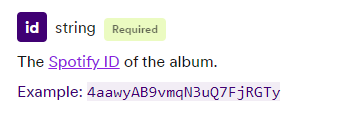

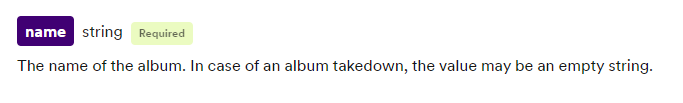

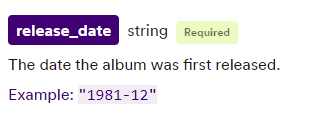

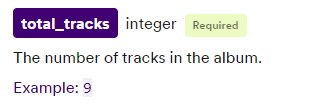



#### album_id

este se validara utilizando el metodo usado atenriomente con los id, reconociendo la longitud del string usado como identificador

In [166]:
# usando el primer registro que se encuentra validado para tomar la longitud del string
str_len = len(tsf_df['album_id'][0])
print("la longitud del string de la columna es {}".format(str_len))
# revisando que todos los registros de la columna sean strings de la misma longitud
tsf_df[tsf_df['album_id'].str.len()!=str_len]

la longitud del string de la columna es 22


,disc_number,duration_ms,explicit,track_number,track_popularity,track_id,track_name,audio_features.danceability,audio_features.energy,audio_features.key,...,audio_features.time_signature,artist_id,artist_name,artist_popularity,album_id,album_name,album_release_date,album_total_tracks,audio_features.instrumentalness_string,audio_features.instrumentalness_x


se aprecia que la columna "album_id" cuenta con todos los registros y a su vez todos ellos tienen 22 caracteres

#### album_name

  de manera similar a el "track_name" para esta columna se validara que cada entrada sea un string.

In [167]:
# definir una funcion para aplicar a cada fila verificando si es un string.
def is_string(x):
    return isinstance(x, str)
# aplicar la funcion "is_string" a cada fila del dataframe y crear una columna nueva con el booleano correspondiente
tsf_df["album_name_str"] = tsf_df["album_name"].apply(is_string)
# seleccionar los registros con string a False
tsf_df[tsf_df["album_name_str"] == False]

,disc_number,duration_ms,explicit,track_number,track_popularity,track_id,track_name,audio_features.danceability,audio_features.energy,audio_features.key,...,artist_id,artist_name,artist_popularity,album_id,album_name,album_release_date,album_total_tracks,audio_features.instrumentalness_string,audio_features.instrumentalness_x,album_name_str
329,1,329160,False,1,42,00vJzaoxM3Eja1doBUhX0P,All Too Well,0.602,0.605,0.0,...,06HL4z0CvFAxyc27GX,Taylor Swift,120,1MPAXuTVL2Ej5x0JHiSPq8,NaN,2017-11-09,46,True,False,False
330,1,220440,False,2,45,22C0JIVhFaczZ4t9heqREN,Wildest Dreams,NaN,NaN,8.0,...,06HL4z0CvFAxyc27GX,Taylor Swift,120,1MPAXuTVL2Ej5x0JHiSPq8,NaN,2017-11-09,46,True,False,False
331,1,246306,False,3,36,7APTsjmZbj7TFXQJAiRti4,The Best Day,0.669,0.448,1.0,...,06HL4z0CvFAxyc27GX,Taylor Swift,120,1MPAXuTVL2Ej5x0JHiSPq8,NaN,2017-11-09,46,True,False,False
332,1,223093,False,4,39,4V9NuhKQcUFt4cgbynHV79,Red,0.605,0.899,1.0,...,06HL4z0CvFAxyc27GX,Taylor Swift,120,1MPAXuTVL2Ej5x0JHiSPq8,NaN,2017-11-09,46,True,False,False
333,1,202960,False,5,36,4hCZk6WJBFQeG3P7WsyntI,Holy Ground,0.627,0.816,4.0,...,06HL4z0CvFAxyc27GX,Taylor Swift,120,1MPAXuTVL2Ej5x0JHiSPq8,NaN,2017-11-09,46,True,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
440,1,83253,False,12,50,4KB3zBArZ1rHRExilzycaV,I Want You Back - Live/2011,0.536,0.512,6.0,...,06HL4z0CvFAxyc27GX,Taylor Swift,120,6fyR4wBPwLHKcRtxgd4sGh,NaN,2010-10-25,16,True,False,False
441,1,404680,False,13,48,4DbI1rr4IQ2bc8nejy9ttd,Dear John - Live/2011,0.521,0.386,4.0,...,06HL4z0CvFAxyc27GX,Taylor Swift,120,6fyR4wBPwLHKcRtxgd4sGh,NaN,2010-10-25,16,True,False,False
442,1,389213,False,14,49,NaN,Enchanted - Live/2011,0.340,0.663,8.0,...,06HL4z0CvFAxyc27GX,Taylor Swift,120,6fyR4wBPwLHKcRtxgd4sGh,NaN,2010-10-25,16,True,False,False
443,1,292426,False,15,48,6znB7YZhMJT2B83zfbiyLq,Haunted - Live/2011,0.338,0.818,5.0,...,06HL4z0CvFAxyc27GX,Taylor Swift,120,6fyR4wBPwLHKcRtxgd4sGh,NaN,2010-10-25,16,True,False,False


al revisar los valores de la columna se reportan los 62 valores nulos identificados anteriormente.

#### album_release_date

es un string de fechas con formato "aaaa-mm-dd"

In [176]:
unique_relese_dates = tsf_df['album_release_date'].sort_values()
print(unique_relese_dates.unique())

['1989-10-24' '2008-06-28' '2008-11-11' '2010-01-01' '2010-10-25'
 '2012-10-22' '2014-01-01' '2017-11-09' '2017-11-10' '2019-08-23'
 '2020-07-24' '2020-08-18' '2020-11-25' '2020-12-11' '2021-01-07'
 '2021-04-09' '2021-11-12' '2022-10-21' '2022-10-22' '2023-07-07'
 '2023-10-26' '2023-10-27' '2027-05-26']


esta columna presenta dos valores sospechosos, la fecha '1989-10-24' que cotejandola con la fecha de nacimiento del artista '1989-12-13' implicaria que el album fue lanzado antes, y la fecha '2027-05-26' que al ser contrastada con la fecha de envio del JSON el '2023-12-28' aun no habria sucedido

### album_total_tracks

es un entero con el numero de pistas en el album

In [178]:
tsf_df["album_total_tracks"].unique()

array(['22', '21', '24', '20', '13', '34', '26', '17', '10', '16', '18',
       '15', '46', '19', '14', '8', 'Thirteen'], dtype=object)

se evidencia en esta columa el valor 'Thirteen' el cual es un string, para tener el formato requerido deberia estar reportado como el entero "13"

## Conclusiones

en conclusion se encontraron las siguientes caracteristicas generales para el conjunto de datos respecto a cada dimension:

Completitud:

In [179]:
completitud

,total valores,total valores nulos,pocentaje de valores nulos (%)
album_name,477,62,12.997904
track_id,531,8,1.506591
track_name,532,7,1.315789
audio_features.energy,537,2,0.372439
audio_features.loudness,537,2,0.372439
audio_features.danceability,537,2,0.372439
audio_features.time_signature,538,1,0.185874
audio_features.speechiness,538,1,0.185874
audio_features.key,538,1,0.185874
audio_features.acousticness,538,1,0.185874


Unicidad: el numero de registros duplicados en el dataframe es 18
su unicidad es del  96.6605 %

Oportunidad: los datos se presumen oportunos debido a que son estaticos

Validez y exactitud: los datos presentan varios problemas de validez, entre los cuales estan:
*   duration_ms: se pueden apreciar valores negativos, lo cual es imposible para una variable temporal.
*   explicit : la columna "explicit" deberia ser un booleano solo con valores "True" o "False", sin embargo presenta 4 registros en el valor "No" y 1 registro en el valor "Si"
* track_popularity: existen seis valores negativos para la columna y un valor por encima de 100, lo cual los convertiria en valores atipicos para la descripcion.
* audio_features.instrumentalness: el intento de convertir la columna a tipo float arroja un error debido a la presencia del valor "7.28x-06" el cual al contener una "x" en lugar de la "e" convencional de la notacion cientifica genera el error.
* album_release_date: esta columna presenta dos valores sospechosos, la fecha '1989-10-24' que cotejandola con la fecha de nacimiento del artista '1989-12-13' implicaria que el album fue lanzado antes, y la fecha '2027-05-26' que al ser contrastada con la fecha de envio del JSON el '2023-12-28' aun no habria sucedido
* album_total_tracks: se evidencia en esta columa el valor 'Thirteen' el cual es un string, para tener el formato requerido deberia estar reportado como el entero "13"

Coherencia: para validar la coherencia se necesitaria de una fuente adicional de referencia para dar como cierta la informacion contenida en el JSON.

con esto concluiria el informe agradeciendo siempre las oportunidades laborales que el desarrollo de este ejercicio pueda traer.

**Henry Cardenas Roa** <br>
**candidato a Data Quality Engineer** <br>
**hgcroa@gmail.com** <br>
**3115126191**



